In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Bank_Campaign_Data.csv')

In [151]:
# prompt: check for missing values

df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [152]:
print(df.duplicated().sum())
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

# Check for missing values
print(df.isnull().sum())


0
Duplicate Rows except first occurrence based on all columns are :
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [153]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [154]:
df.to_csv('Bank_Campaign_Data_Encoded.csv', index=False)

In [155]:
data = df

In [156]:
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [163]:
# prompt: encode columns that are non numerical

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is already loaded as in your previous code

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column
for col in df.columns:
    # Check if the column is of object type (non-numeric)
    if df[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col])

# Now all non-numeric columns in df are encoded

# The rest of your code
# df.to_csv('Bank_Campaign_Data_Encoded.csv', index=False)
# data = df
# data.head(20)

print(df.head(10))


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2        1        2        1     0        2   
8   58    5        1          0        0      121        1     0        2   
9   43    9        2          1        0      593        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       

ValueError: num must be an integer with 1 <= num <= 10, not 11

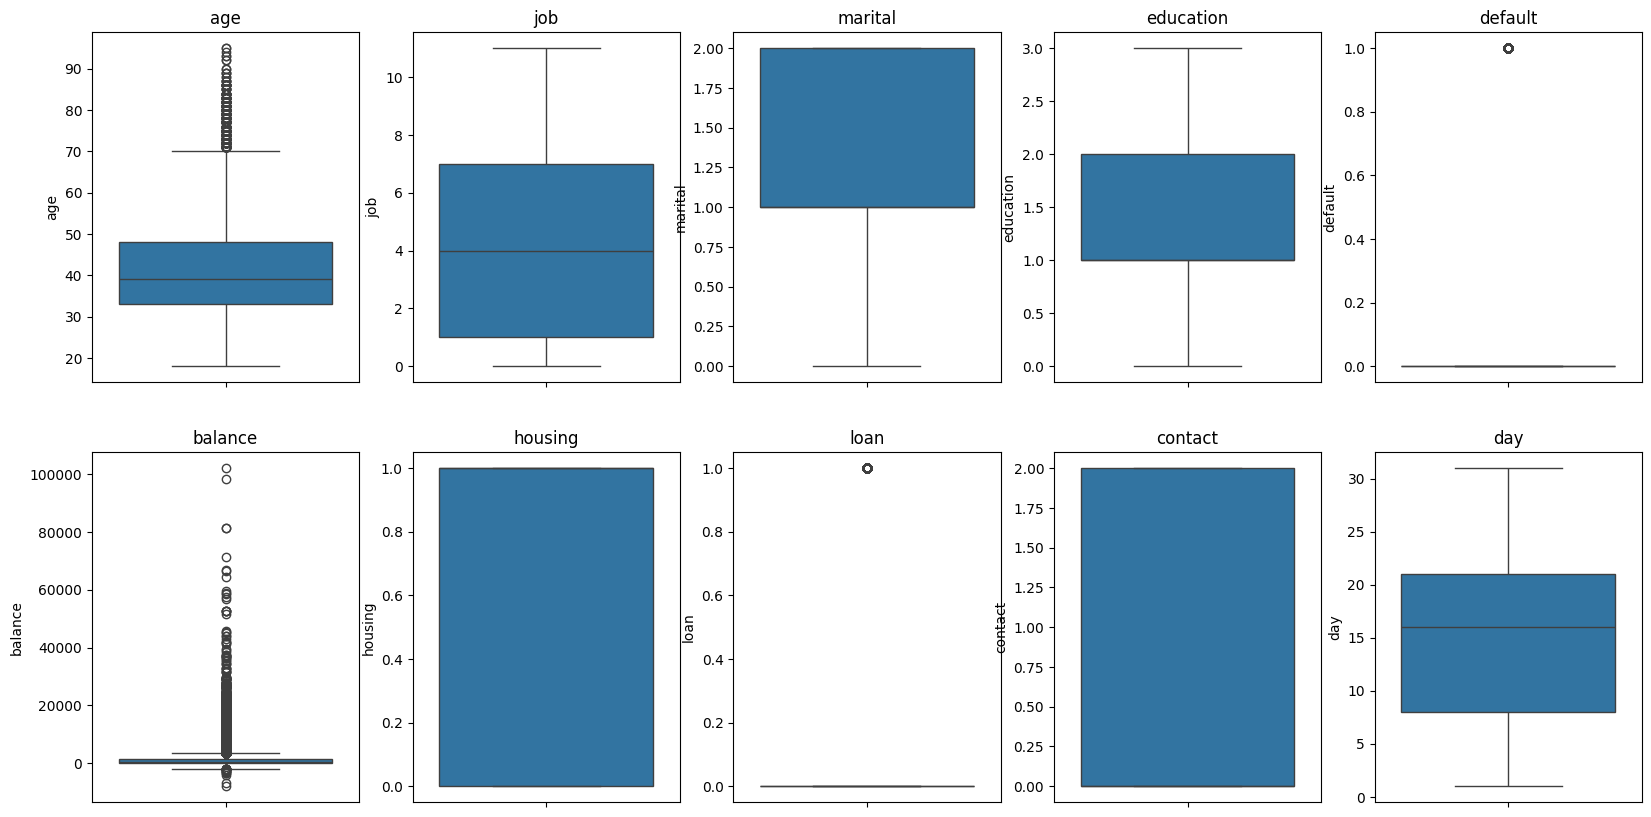

In [164]:
# prompt: generate box plot for all the columns next to each other

import matplotlib.pyplot as plt
# Assuming df is your DataFrame with encoded data

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Create the box plots
for i, col in enumerate(df.columns):
    plt.subplot(2, 5, i + 1)  # Create subplots in a 2x5 grid
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [165]:
# prompt: treat the outliers for balance and duration columns

import matplotlib.pyplot as plt
import numpy as np
# Calculate quantiles for 'balance' and 'duration'
balance_Q1 = df['balance'].quantile(0.25)
balance_Q3 = df['balance'].quantile(0.75)
balance_IQR = balance_Q3 - balance_Q1
balance_lower_bound = balance_Q1 - 1.5 * balance_IQR
balance_upper_bound = balance_Q3 + 1.5 * balance_IQR

duration_Q1 = df['duration'].quantile(0.25)
duration_Q3 = df['duration'].quantile(0.75)
duration_IQR = duration_Q3 - duration_Q1
duration_lower_bound = duration_Q1 - 1.5 * duration_IQR
duration_upper_bound = duration_Q3 + 1.5 * duration_IQR

# Replace outliers with the bounds
df['balance'] = np.where(df['balance'] < balance_lower_bound, balance_lower_bound,
                        np.where(df['balance'] > balance_upper_bound, balance_upper_bound, df['balance']))

df['duration'] = np.where(df['duration'] < duration_lower_bound, duration_lower_bound,
                        np.where(df['duration'] > duration_upper_bound, duration_upper_bound, df['duration']))

# Display the updated DataFrame
print(df.head(20))


    age  job  marital  education  default  balance  housing  loan  contact  \
0    58    4        1          2        0   2143.0        1     0        2   
1    44    9        2          1        0     29.0        1     0        2   
2    33    2        1          1        0      2.0        1     1        2   
3    47    1        1          3        0   1506.0        1     0        2   
4    33   11        2          3        0      1.0        0     0        2   
5    35    4        1          2        0    231.0        1     0        2   
6    28    4        2          2        0    447.0        1     1        2   
7    42    2        0          2        1      2.0        1     0        2   
8    58    5        1          0        0    121.0        1     0        2   
9    43    9        2          1        0    593.0        1     0        2   
10   41    0        0          1        0    270.0        1     0        2   
11   29    0        2          1        0    390.0        1     

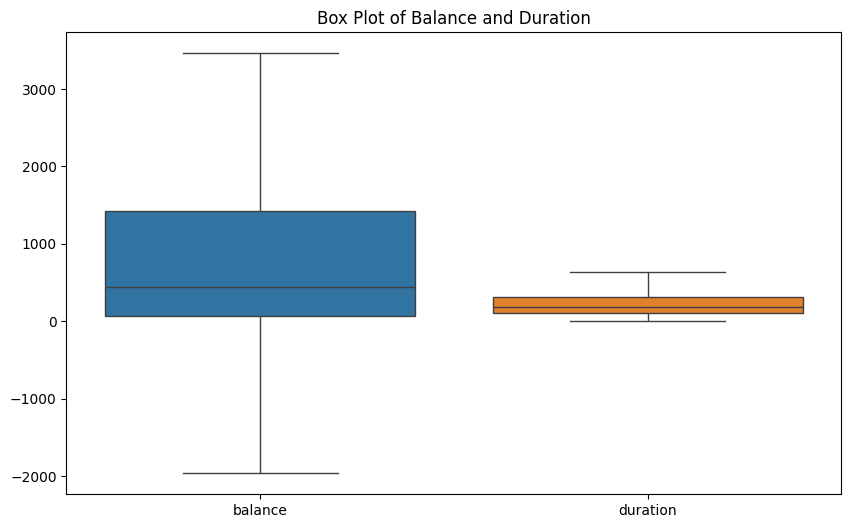

In [166]:
# prompt: generate the box plot for balance and duration columns

import matplotlib.pyplot as plt
# Create the box plot for 'balance' and 'duration' columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['balance', 'duration']])
plt.title("Box Plot of Balance and Duration")
plt.show()


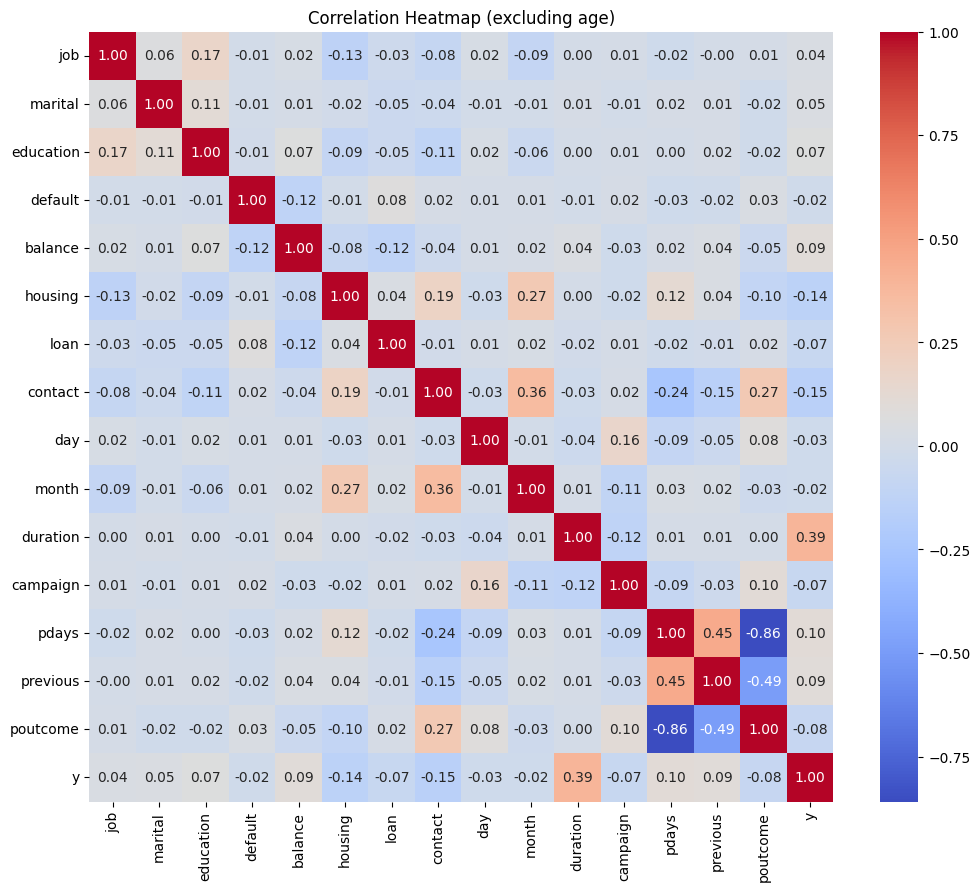

In [167]:
# prompt: generate the heat map expect age column

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it's already loaded and preprocessed

# Remove 'age' column if it exists
if 'age' in df.columns:
    df = df.drop('age', axis=1)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (excluding age)')
plt.show()


In [168]:
# prompt: define dependent variable as y and independent variable as x and show them

# Define dependent and independent variables
y = df['y']  # Assuming 'y' is your dependent variable column
x = df.drop('y', axis=1)  # Assuming all other columns are independent variables

# Show the first few rows of the dependent variable
print("Dependent Variable (y):\n", y.head())

# Show the first few rows of the independent variables
print("\nIndependent Variables (x):\n", x.head())



Dependent Variable (y):
 0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Independent Variables (x):
    job  marital  education  default  balance  housing  loan  contact  day  \
0    4        1          2        0   2143.0        1     0        2    5   
1    9        2          1        0     29.0        1     0        2    5   
2    2        1          1        0      2.0        1     1        2    5   
3    1        1          3        0   1506.0        1     0        2    5   
4   11        2          3        0      1.0        0     0        2    5   

   month  duration  campaign  pdays  previous  poutcome  
0      8     261.0         1     -1         0         3  
1      8     151.0         1     -1         0         3  
2      8      76.0         1     -1         0         3  
3      8      92.0         1     -1         0         3  
4      8     198.0         1     -1         0         3  


Pseudo R-squared (0.2803): This indicates how well the model explains variability in the dependent variable. A value of 0.28 suggests a moderate relationship between predictors and the target.

In [170]:
# prompt: perform logistic regression using stats model

import statsmodels.api as sm

# Add a constant to the independent variables
x = sm.add_constant(x)

# Fit the logistic regression model
model = sm.Logit(y, x).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.259734
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2803
Time:                        16:54:41   Log-Likelihood:                -11743.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4801      0.118    -37.880      0.000      -4.712      -4.248
job            0.0094      0.

Marital Status (0.1545, p = 0.000): Positive impact on the target.

Education (0.1903, p = 0.000): Higher education levels increase the likelihood of the event occurring.

Housing Loan (-1.0402, p = 0.000): Negative impact—having a housing loan decreases the likelihood of the event.

Contact Method (-0.5856, p = 0.000): Contact method significantly influences the outcome.

Campaign (-0.1097, p = 0.000): More marketing attempts negatively affect the outcome.

Previous Campaign Success (0.0904, p = 0.000): A positive impact on the likelihood of a successful outcome.

In [171]:
# prompt: drop insignificant variables and generate logistic regression till all variables are significant

# Function to perform logistic regression and remove insignificant variables
def stepwise_selection(x, y):
    # Add a constant to the independent variables
    x = sm.add_constant(x)

    # Initialize variables to store significant variables and p-values
    significant_vars = list(x.columns)
    p_values = {}

    while True:
        # Fit the logistic regression model
        model = sm.Logit(y, x[significant_vars]).fit(disp=0)  # Suppress convergence messages

        # Get p-values for all variables
        p_values = model.pvalues

        # Find the least significant variable (highest p-value)
        max_p_value = max(p_values[1:])  # Exclude the constant term
        max_p_var = p_values[p_values == max_p_value].index[0]

        if max_p_value > 0.05:
            # Remove the least significant variable
            significant_vars.remove(max_p_var)
            print(f"Removing variable: {max_p_var} (p-value: {max_p_value:.3f})")
        else:
            # All remaining variables are significant
            break

    # Print the final significant variables and model summary
    print("\nFinal significant variables:", significant_vars)
    final_model = sm.Logit(y, x[significant_vars]).fit(disp=0)
    print(final_model.summary())
    return final_model

# Call the stepwise selection function
final_model = stepwise_selection(x,y)


Removing variable: job (p-value: 0.080)

Final significant variables: ['const', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2802
Time:                        16:55:13   Log-Likelihood:                -11744.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

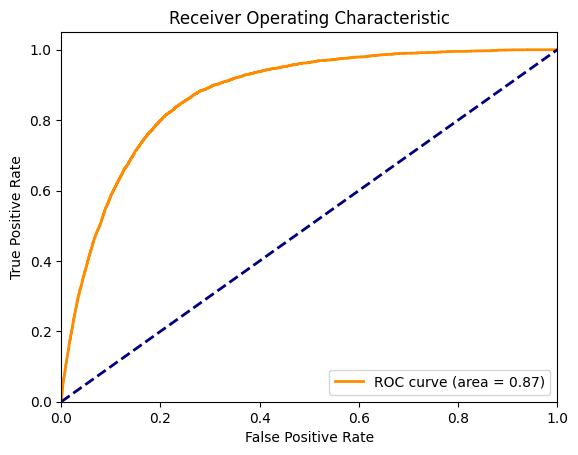

In [174]:
# prompt: generate auc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'final_model' is the fitted logistic regression model from stepwise_selection
y_pred_prob = final_model.predict(sm.add_constant(x[final_model.params.index[1:]])) # Predict probabilities

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The AUC (Area Under the Curve) = 0.87, meaning the model has a high discriminative power.

Closer to 1 → better model; since 0.87 is quite close to 1, this suggests that the logistic regression model performs well in distinguishing between the two classes.

The model is moderately strong with an AUC of 0.87.

The key factors impacting the outcome include education, marital status, balance, housing loan, and previous campaign success.

The model is useful for predicting outcomes, but further optimization might improve accuracy.